In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName("London crime dataset analysis").getOrCreate()

In [4]:
data = spark.read.format('csv').option('header', True).load('london_crime_by_lsoa.csv')

In [5]:
data.show()

+---------+--------------------+--------------------+--------------------+-----+----+-----+
|lsoa_code|             borough|      major_category|      minor_category|value|year|month|
+---------+--------------------+--------------------+--------------------+-----+----+-----+
|E01001116|             Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774|           Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|          Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
|E01001320|              Ealing|  Theft and Handling|         Other Theft|    0|2012|    5|
|E01001342|              Ealing|Violence Against ...|    Offensive Weapon|    0|2010|    7|
|E01002633|            Hounslow|             Robbery|   Personal Property|    0|

In [6]:
#print schema of the data
data.printSchema()

root
 |-- lsoa_code: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- major_category: string (nullable = true)
 |-- minor_category: string (nullable = true)
 |-- value: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)



In [7]:
data.count()

13490604

In [8]:
data.limit(5).show()

+---------+----------+--------------------+--------------------+-----+----+-----+
|lsoa_code|   borough|      major_category|      minor_category|value|year|month|
+---------+----------+--------------------+--------------------+-----+----+-----+
|E01001116|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+---------+----------+--------------------+--------------------+-----+----+-----+



In [9]:
#drop record with null values
data.dropna()

DataFrame[lsoa_code: string, borough: string, major_category: string, minor_category: string, value: string, year: string, month: string]

In [10]:
#drop columns which are not needed so that processing gets faster
data = data.drop('lsoa_code')

In [20]:
data.show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|             Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|           Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|          Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
|              Ealing|  Theft and Handling|         Other Theft|    0|2012|    5|
|              Ealing|Violence Against ...|    Offensive Weapon|    0|2010|    7|
|            Hounslow|             Robbery|   Personal Property|    0|2013|    4|
|              Newham|     Criminal Damage|Criminal Damage T...|    0|2013|    9|
|              S

In [22]:
distinct_borough = data.select('borough').distinct()

In [24]:
distinct_borough.show()

+--------------------+
|             borough|
+--------------------+
|             Croydon|
|          Wandsworth|
|              Bexley|
|             Lambeth|
|Barking and Dagenham|
|              Camden|
|           Greenwich|
|              Newham|
|       Tower Hamlets|
|            Hounslow|
|              Barnet|
|              Harrow|
|Kensington and Ch...|
|           Islington|
|               Brent|
|            Haringey|
|             Bromley|
|              Merton|
|         Westminster|
|             Hackney|
+--------------------+
only showing top 20 rows



In [26]:
Hackney_data = data.filter(data['borough'] == 'Hackney')
Hackney_data.show()

+-------+--------------------+--------------------+-----+----+-----+
|borough|      major_category|      minor_category|value|year|month|
+-------+--------------------+--------------------+-----+----+-----+
|Hackney|     Criminal Damage|Criminal Damage T...|    0|2011|    6|
|Hackney|Violence Against ...|          Harassment|    1|2013|    2|
|Hackney|     Criminal Damage|Other Criminal Da...|    0|2011|    7|
|Hackney|Violence Against ...|        Wounding/GBH|    0|2013|   12|
|Hackney|  Theft and Handling|  Other Theft Person|    0|2016|    8|
|Hackney|            Burglary|Burglary in a Dwe...|    2|2008|    5|
|Hackney|             Robbery|   Business Property|    0|2016|    7|
|Hackney|  Theft and Handling|Theft/Taking of P...|    0|2009|   12|
|Hackney|               Drugs|    Drug Trafficking|    0|2014|    4|
|Hackney|  Theft and Handling|Handling Stolen G...|    0|2014|    6|
|Hackney|            Burglary|Burglary in Other...|    0|2008|   12|
|Hackney|Violence Against ...| Ass

In [31]:
data_2015_16 = data.filter(data['year'].isin(['2015','2016']))
data_2015_16.sample(fraction = 0.1).show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|            Haringey|Violence Against ...|        Wounding/GBH|    0|2015|   12|
|              Ealing|             Robbery|   Personal Property|    0|2015|    7|
|           Greenwich|            Burglary|Burglary in Other...|    0|2016|   11|
|             Croydon|             Robbery|   Personal Property|    0|2016|    1|
|              Newham|  Theft and Handling|Theft/Taking of P...|    0|2016|    3|
|            Havering|            Burglary|Burglary in a Dwe...|    1|2016|    8|
|             Croydon|  Theft and Handling|Motor Vehicle Int...|    0|2016|    3|
|           Islington|     Sexual Offences|        Other Sexual|    0|2016|   10|
|      Waltham Forest|Violence Against ...|      Other violence|    0|2016|    9|
|       Tower Ha

In [38]:
#group over borough column and find corresponding count 
borough_count = data.groupBy('borough').count()
borough_count.show()

+--------------------+------+
|             borough| count|
+--------------------+------+
|             Croydon|602100|
|          Wandsworth|498636|
|              Bexley|385668|
|             Lambeth|519048|
|Barking and Dagenham|311040|
|              Camden|378432|
|           Greenwich|421200|
|              Newham|471420|
|       Tower Hamlets|412128|
|            Hounslow|395928|
|              Barnet|572832|
|              Harrow|365688|
|Kensington and Ch...|296784|
|           Islington|359208|
|               Brent|490644|
|            Haringey|413856|
|             Bromley|523908|
|              Merton|339876|
|         Westminster|366660|
|             Hackney|417744|
+--------------------+------+
only showing top 20 rows



In [43]:
borough_conviction_sum = data.groupBy('borough').agg({'value':'sum'})
borough_conviction_sum.show(5)

+--------------------+----------+
|             borough|sum(value)|
+--------------------+----------+
|             Croydon|  260294.0|
|          Wandsworth|  204741.0|
|              Bexley|  114136.0|
|             Lambeth|  292178.0|
|Barking and Dagenham|  149447.0|
+--------------------+----------+
only showing top 5 rows



In [45]:
borough_conviction = data.groupBy('borough').agg({'value':'sum'})\
                        .withColumnRenamed('sum(value)', 'convictions')

In [46]:
borough_conviction.show()

+--------------------+-----------+
|             borough|convictions|
+--------------------+-----------+
|             Croydon|   260294.0|
|          Wandsworth|   204741.0|
|              Bexley|   114136.0|
|             Lambeth|   292178.0|
|Barking and Dagenham|   149447.0|
|              Camden|   275147.0|
|           Greenwich|   181568.0|
|              Newham|   262024.0|
|       Tower Hamlets|   228613.0|
|            Hounslow|   186772.0|
|              Barnet|   212191.0|
|              Harrow|   116848.0|
|Kensington and Ch...|   171981.0|
|           Islington|   230286.0|
|               Brent|   227551.0|
|            Haringey|   213272.0|
|             Bromley|   184349.0|
|              Merton|   115654.0|
|         Westminster|   455028.0|
|             Hackney|   217119.0|
+--------------------+-----------+
only showing top 20 rows



In [49]:
#total no. of convictions over all boroghs
borough_conviction.agg({'convictions' : 'sum'}).show()

+----------------+
|sum(convictions)|
+----------------+
|       6447758.0|
+----------------+



In [52]:
total_convictions = borough_conviction.agg({'convictions' : 'sum'}).collect()[0][0]

In [53]:
total_convictions

6447758.0

In [55]:
import pyspark.sql.functions as func

In [64]:
borough_percentage_contribution = \
borough_conviction.withColumn\
('% contribution', func.round(borough_conviction.convictions/total_convictions * 100, 2))

In [65]:
borough_percentage_contribution.show()

+--------------------+-----------+--------------+
|             borough|convictions|% contribution|
+--------------------+-----------+--------------+
|             Croydon|   260294.0|          4.04|
|          Wandsworth|   204741.0|          3.18|
|              Bexley|   114136.0|          1.77|
|             Lambeth|   292178.0|          4.53|
|Barking and Dagenham|   149447.0|          2.32|
|              Camden|   275147.0|          4.27|
|           Greenwich|   181568.0|          2.82|
|              Newham|   262024.0|          4.06|
|       Tower Hamlets|   228613.0|          3.55|
|            Hounslow|   186772.0|           2.9|
|              Barnet|   212191.0|          3.29|
|              Harrow|   116848.0|          1.81|
|Kensington and Ch...|   171981.0|          2.67|
|           Islington|   230286.0|          3.57|
|               Brent|   227551.0|          3.53|
|            Haringey|   213272.0|          3.31|
|             Bromley|   184349.0|          2.86|


In [66]:
borough_percentage_contribution.printSchema()

root
 |-- borough: string (nullable = true)
 |-- convictions: double (nullable = true)
 |-- % contribution: double (nullable = true)



In [70]:
borough_percentage_contribution.orderBy(borough_percentage_contribution[2].desc()).show(10)

+-------------+-----------+--------------+
|      borough|convictions|% contribution|
+-------------+-----------+--------------+
|  Westminster|   455028.0|          7.06|
|      Lambeth|   292178.0|          4.53|
|    Southwark|   278809.0|          4.32|
|       Camden|   275147.0|          4.27|
|       Newham|   262024.0|          4.06|
|      Croydon|   260294.0|          4.04|
|       Ealing|   251562.0|           3.9|
|    Islington|   230286.0|          3.57|
|Tower Hamlets|   228613.0|          3.55|
|        Brent|   227551.0|          3.53|
+-------------+-----------+--------------+
only showing top 10 rows



In [76]:
#convictions for year 2014 per month
conviction_monthly = data.filter(data['year'] == 2014).groupBy('month')\
                    .agg({'value' : 'sum'}).withColumnRenamed('sum(value)', 'conviction')

In [77]:
conviction_monthly.show()

+-----+----------+
|month|conviction|
+-----+----------+
|    7|   58564.0|
|   11|   59704.0|
|    3|   57669.0|
|    8|   55641.0|
|    5|   56327.0|
|    6|   57039.0|
|    9|   56933.0|
|    1|   55515.0|
|   10|   60537.0|
|    4|   53467.0|
|   12|   57565.0|
|    2|   51222.0|
+-----+----------+



In [79]:
total_conviction_monthly = conviction_monthly.agg({'conviction' : 'sum'}).collect()[0][0]

In [80]:
total_conviction_monthly

680183.0

In [83]:
monthly_conviction_distribution = conviction_monthly\
.withColumn('% contribution', func.round(conviction_monthly.conviction/total_conviction_monthly * 100 , 2))

In [84]:
monthly_conviction_distribution.show()

+-----+----------+--------------+
|month|conviction|% contribution|
+-----+----------+--------------+
|    7|   58564.0|          8.61|
|   11|   59704.0|          8.78|
|    3|   57669.0|          8.48|
|    8|   55641.0|          8.18|
|    5|   56327.0|          8.28|
|    6|   57039.0|          8.39|
|    9|   56933.0|          8.37|
|    1|   55515.0|          8.16|
|   10|   60537.0|           8.9|
|    4|   53467.0|          7.86|
|   12|   57565.0|          8.46|
|    2|   51222.0|          7.53|
+-----+----------+--------------+



In [86]:
monthly_conviction_distribution.orderBy(monthly_conviction_distribution[2].desc()).show()

+-----+----------+--------------+
|month|conviction|% contribution|
+-----+----------+--------------+
|   10|   60537.0|           8.9|
|   11|   59704.0|          8.78|
|    7|   58564.0|          8.61|
|    3|   57669.0|          8.48|
|   12|   57565.0|          8.46|
|    6|   57039.0|          8.39|
|    9|   56933.0|          8.37|
|    5|   56327.0|          8.28|
|    8|   55641.0|          8.18|
|    1|   55515.0|          8.16|
|    4|   53467.0|          7.86|
|    2|   51222.0|          7.53|
+-----+----------+--------------+



In [12]:
#conviction based on major_category
conviction_major_cat = data.groupBy('major_category')\
                    .agg({'value' : 'sum'}).withColumnRenamed('sum(value)', 'conviction')
conviction_major_cat.show()

+--------------------+----------+
|      major_category|conviction|
+--------------------+----------+
|               Drugs|  470765.0|
|             Robbery|  258873.0|
|  Theft and Handling| 2661861.0|
|    Fraud or Forgery|    5325.0|
|Violence Against ...| 1558081.0|
|            Burglary|  754293.0|
|Other Notifiable ...|  106349.0|
|     Sexual Offences|    1273.0|
|     Criminal Damage|  630938.0|
+--------------------+----------+



In [14]:
conviction_major_cat.orderBy(conviction_major_cat[1].desc()).show()

+--------------------+----------+
|      major_category|conviction|
+--------------------+----------+
|  Theft and Handling| 2661861.0|
|Violence Against ...| 1558081.0|
|            Burglary|  754293.0|
|     Criminal Damage|  630938.0|
|               Drugs|  470765.0|
|             Robbery|  258873.0|
|Other Notifiable ...|  106349.0|
|    Fraud or Forgery|    5325.0|
|     Sexual Offences|    1273.0|
+--------------------+----------+



In [15]:
#Find minimum and maximum of a year 
col_year = data.select('year')
col_year.show()

+----+
|year|
+----+
|2016|
|2016|
|2015|
|2016|
|2008|
|2012|
|2010|
|2013|
|2013|
|2016|
|2013|
|2015|
|2014|
|2011|
|2016|
|2012|
|2009|
|2009|
|2016|
|2009|
+----+
only showing top 20 rows



In [16]:
col_year.agg({'year' : 'min'}).show()

+---------+
|min(year)|
+---------+
|     2008|
+---------+



In [17]:
col_year.agg({'year' : 'max'}).show()

+---------+
|max(year)|
+---------+
|     2016|
+---------+



In [19]:
#describe dataframe 
col_year.describe().show()

+-------+-----------------+
|summary|             year|
+-------+-----------------+
|  count|         13490604|
|   mean|           2012.0|
| stddev|2.581988993167432|
|    min|             2008|
|    max|             2016|
+-------+-----------------+



In [26]:
data.crosstab('borough', 'major_category').select('borough_major_category').show()

+----------------------+
|borough_major_category|
+----------------------+
|              Havering|
|                Merton|
|              Haringey|
|         Tower Hamlets|
|               Bromley|
|               Enfield|
|  Kingston upon Thames|
|           Westminster|
|  Richmond upon Thames|
|              Lewisham|
|                 Brent|
|  Barking and Dagenham|
|             Redbridge|
|             Islington|
|               Hackney|
|                Newham|
|        City of London|
|                Sutton|
|             Southwark|
|                Harrow|
+----------------------+
only showing top 20 rows



In [29]:
data\
.crosstab('borough', 'major_category')\
.select('borough_major_category','Burglary','Drugs','Fraud or Forgery', 'Robbery').show()

+----------------------+--------+-----+----------------+-------+
|borough_major_category|Burglary|Drugs|Fraud or Forgery|Robbery|
+----------------------+--------+-----+----------------+-------+
|              Havering|   32400|32616|            5508|  27648|
|                Merton|   26784|29160|            5724|  23652|
|              Haringey|   31320|35424|           10368|  29484|
|         Tower Hamlets|   31104|37368|            5400|  28512|
|               Bromley|   42552|42336|            8532|  34668|
|               Enfield|   39528|44064|            9720|  35532|
|  Kingston upon Thames|   21168|22140|            3780|  15660|
|           Westminster|   27648|32616|            8748|  25056|
|  Richmond upon Thames|   24840|23004|            2808|  18468|
|              Lewisham|   36504|43740|           11016|  34884|
|                 Brent|   37368|46980|            9288|  34128|
|  Barking and Dagenham|   23760|26244|            7236|  22248|
|             Redbridge| 

In [30]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [38]:
yearly_details = data.filter(data['year'] == 2014).groupBy('month')\
                    .agg({'value' : 'sum'}).withColumnRenamed('sum(value)', 'conviction')
borough_list = [x[0] for x in yearly_details.toLocalIterator()]
borough_list

['7', '11', '3', '8', '5', '6', '9', '1', '10', '4', '12', '2']

In [39]:
conviction_list = [x[1] for x in yearly_details.toLocalIterator()]

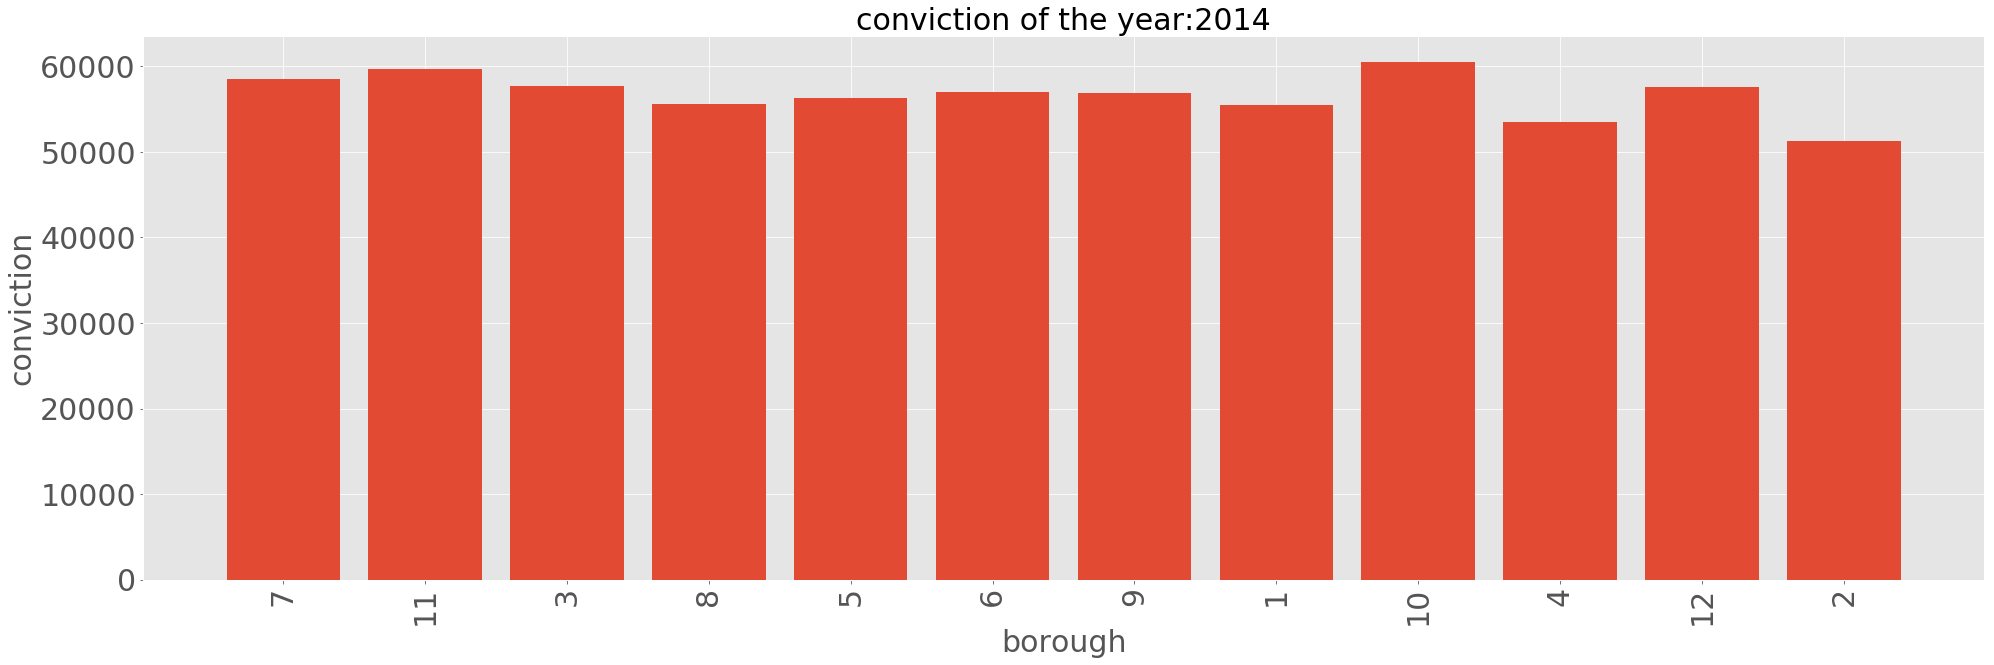

In [41]:
def describe_year(year):
    yearly_details = data.filter(data['year'] == year).groupBy('month')\
                        .agg({'value' : 'sum'}).withColumnRenamed('sum(value)', 'conviction')
    borough_list = [x[0] for x in yearly_details.toLocalIterator()]
    conviction_list = [x[1] for x in yearly_details.toLocalIterator()]
    plt.figure(figsize = (33,10))
    plt.bar(borough_list, conviction_list)
    plt.title('conviction of the year:' + year, fontsize = 30)
    plt.xlabel('borough', fontsize = 30)
    plt.ylabel('conviction', fontsize = 30)
    plt.xticks(rotation = 90, fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.autoscale()
    plt.show()
    
describe_year('2014')